# Problem 🧐🧪

This competition is a bioassay task for anticancer activity prediction, where each chemical compound is represented as a graph, with atoms representing nodes and bonds as edges. A chemical compound is positive against non-small cell lung cancer, or negative otherwise. Up to this point, you have learned various tricks and mechanisms to be used for building neural networks/tuning models.


Problem: Predicting the anticancer activity of chemical compounds against non-small cell lung cancer.

Input: Graph representations of chemical compounds, with atoms as nodes and bonds as edges.

Output: Classification of chemical compounds as either positive (active against non-small cell lung cancer) or negative.

Data mining function required: Classification.

Challenges:
1. Handling the complexity of graph data.
2. Dealing with the large number of chemical compounds and their diverse structures.
3. Ensuring the reliability and accuracy of the predictions, especially in the medical domain.

Impact: Successful prediction of anticancer activity could lead to the discovery of new drug candidates, potentially saving lives and improving healthcare outcomes.

Ideal solution: An ideal solution would involve developing a robust classification model that effectively processes graph data, accurately predicts the anticancer activity of chemical compounds, and can be validated through rigorous testing and experimentation. Additionally, integration of domain knowledge and advanced techniques for feature extraction and model optimization could enhance the performance of the solution.

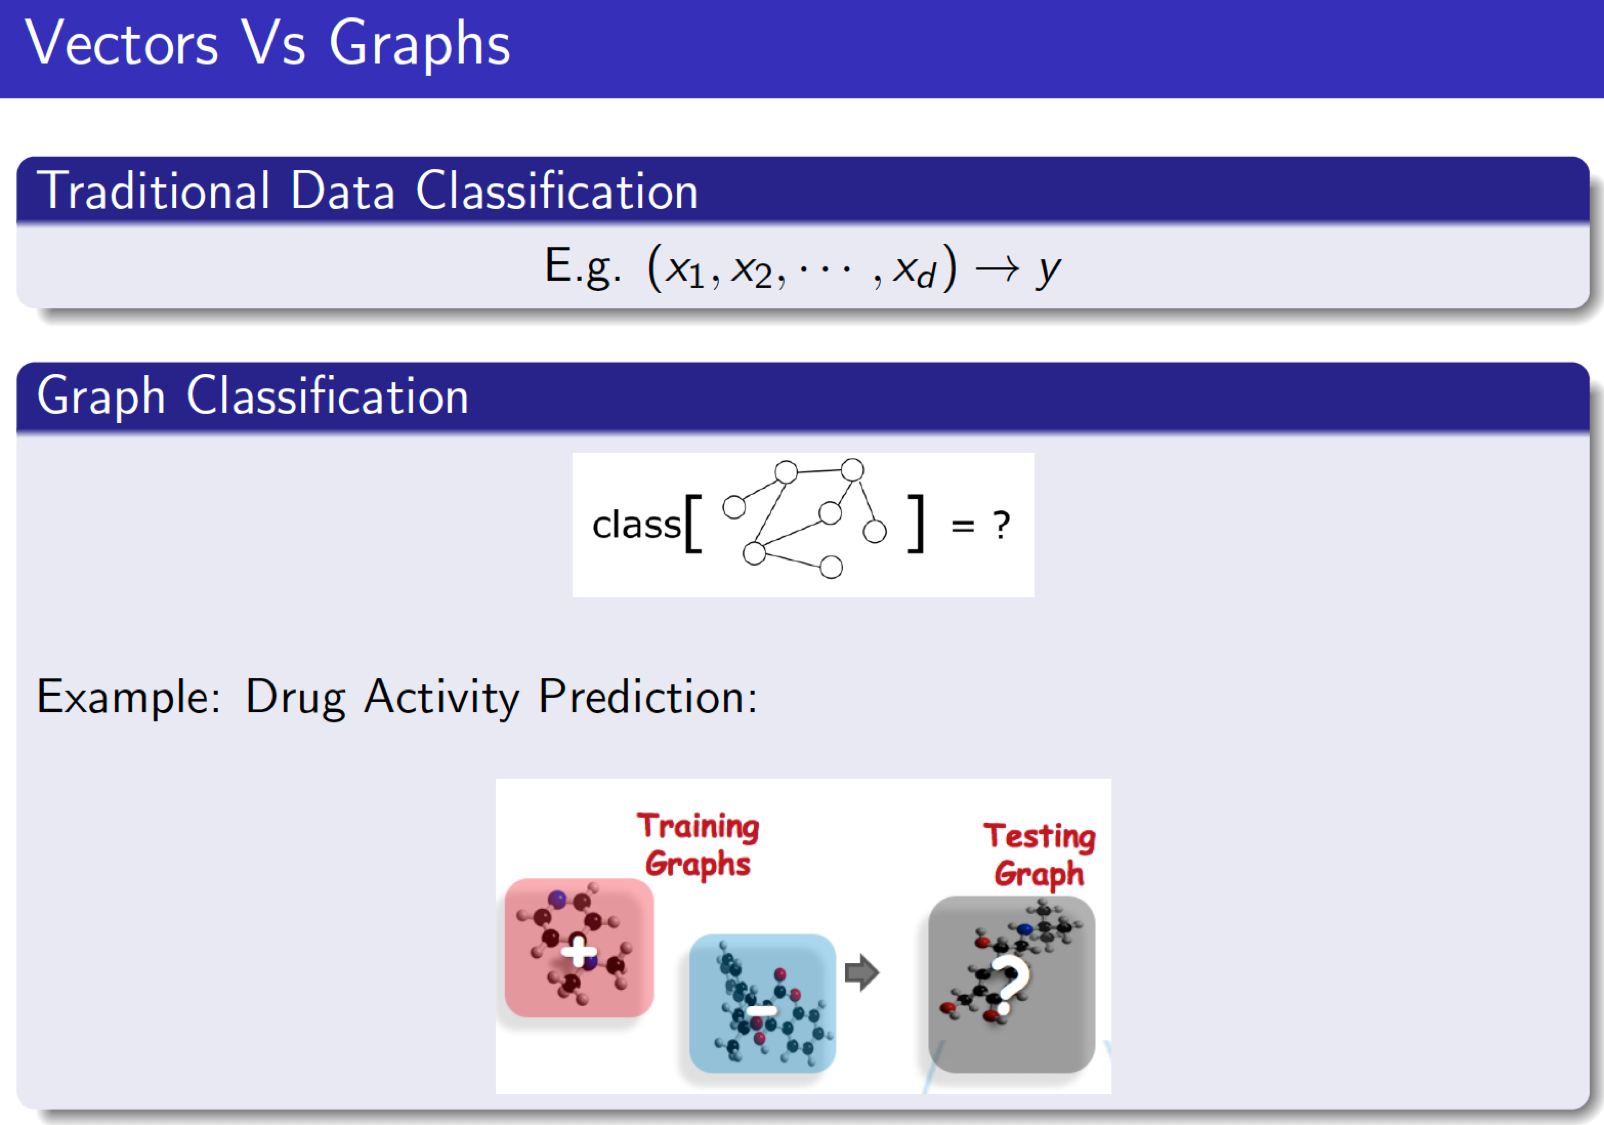

# About the notebook

It will be an experimentatoin journey to tune at least 10 times. All the tried solutions should be different (e.g. different feature sets/different preprocessing). The tried solutions should cover at least:

- GCN aggregation mechanisms: Tune at least three aggregation mechanisms (aka message_passing mechanisms) used in the graph convolution layer. Explain your understanding (based on the documentation/paper) of the mechanisms you chose.

- Up-sampling: adjust the training data preparation/generation part to up-sample the positive class samples (very unbalanced dataset)

Questions related to the Data Mining course:


**🌈Based on the provided template, describe the format of the input file (sdf file).**


This is a representation of a molecular structure, which is often stored in a SDF file format.

The SDF file format is an ASCII text-based format which contains multiple entries. Each entry consists of:
1. **Molecule structure**: This includes atom symbols and a connection table that describes the bonds between the atoms.
2. **Properties**: These are optional and can include a variety of data associated with the molecule.
3. **Molecule name and other identifiers**: These are also optional.

Each entry in an SDF file ends with a line containing four dollar signs `$$$$`. This allows multiple chemical structures to be included in a single SDF file.

Example from source: https://lifechemicals.com/order-and-supply/how-to-work-with-sd-files

This is a compound `F2135-1207`

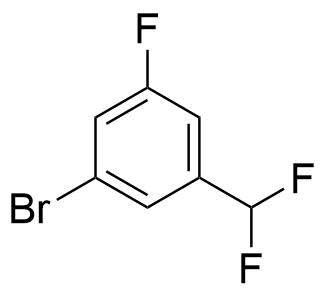

and this is the way SDF reprsents it


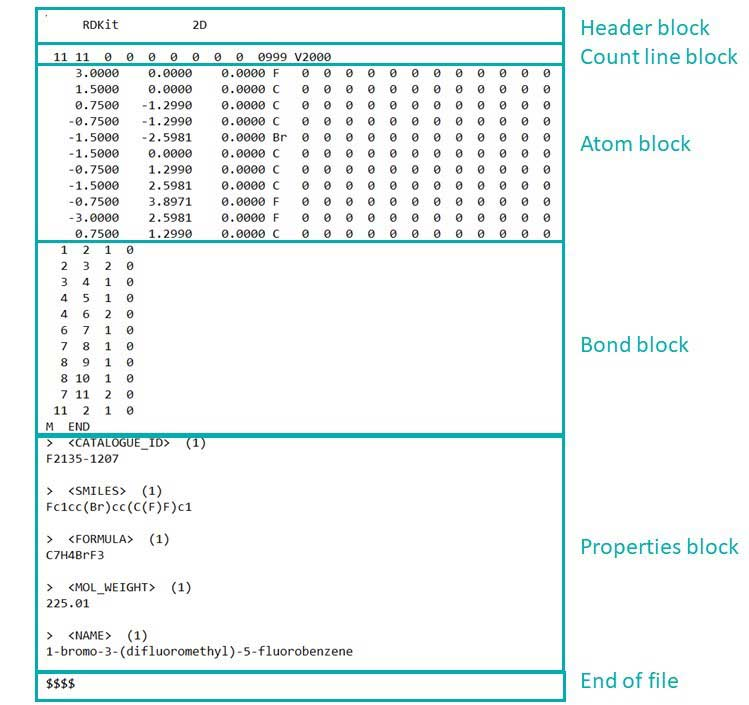

**🌈What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?**

the input tensors typically represent the data that the model will learn from. The dimensions of these tensors (also known as their shape) can vary depending on the type of data and the specific architecture of the model.

Dimensions vary depending on the type of data so, we can categories as follows:

Images: Input is a 4D tensor (batch_size, height, width, channels).
Text: Input is a 2D or 3D tensor (batch_size, sequence_length) or (batch_size, sequence_length, embedding_dim).
Tabular data: Input is a 2D tensor (batch_size, num_features).

For molecular data:

Node features: 2D tensor (num_nodes, node_feat_dim).
Edge features/Adjacency matrix: 2D or 3D tensor (num_nodes, num_nodes) or (num_nodes, num_nodes, edge_feat_dim).
Graph-level features: 1D tensor (graph_feat_dim,).

**🌈For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?**

- `gnn_out`: This is the output from the Graph Neural Network (GNN). If it's a 2D tensor with shape `(num_nodes, output_dim)`, then:
  - `num_nodes` is the number of nodes (or atoms) in your graph (or molecule). Each node corresponds to a row in `gnn_out`.
  - `output_dim` is the size of the feature vector for each node. Each feature could represent a learned attribute about the node.

- `avg`: This is the result of applying the `segment_mean` function to `gnn_out`. If it's a 2D tensor with shape `(num_segments, output_dim)`, then:
  - `num_segments` is the number of unique segments (or graphs/molecules) in your data. Each segment corresponds to a row in `avg`.
  - `output_dim` is the same as in `gnn_out`. It's the size of the feature vector for each segment. Each feature here represents a learned attribute about the segment, computed as the mean of the node features in that segment.

Generally, each dimension in `gnn_out` and `avg` corresponds to a learned feature about a node or a segment, respectively.


**🌈What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?**


- `tf.reduce_mean`: Computes the mean of elements across dimensions of a tensor.
- `segment_mean`: Computes the mean along segments of a tensor. Segments are specified by an additional tensor.

For `pred` tensor in a model:
- **Batch size**: Number of examples in the batch.
- **Sequence length**: Length of the sequence in sequential data.
- **Feature size**: Number of features or classes in the prediction.`


**🌈What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?**

- It can capture more complex patterns and learn hierarchical representations by using several GCN layers.
- Information is collected from a larger neighborhood by each layer.
- Nonetheless, deep GCNs can suffer from over-smoothing leading to nodes that are too similar.
- To avoid this problem, new designs such as Lasagne use node embeddings that adaptively aggregate across nodes thus eliminating over-smoothing issue.
- The decision whether to use single layer or multi-layer GCN relies on task requirements and graph complexityrequirements for each problem set.

The template uses one layer of gcn.

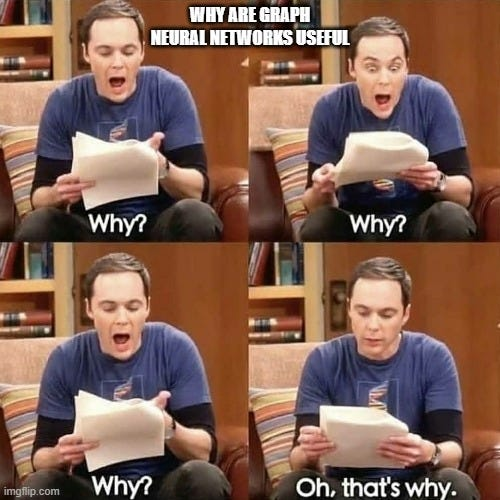

# Setting up the environment

In [ ]:
!pip install --quiet tf2_gnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.5/394.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.1/166.1 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
# needed libraries

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import math
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random


In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 50))

# Data

We have sdf files contain the molecular structures, in plain text following a specific format. you can open it using any text editor.

In [ ]:
!unzip /content/train.sdf.zip

Archive:  /content/train.sdf.zip
  inflating: train.sdf               


In [ ]:
!unzip /content/test_x.sdf.zip

Archive:  /content/test_x.sdf.zip
  inflating: test_x.sdf              


In [ ]:
def read_sdf(file):
    # Open the file in read mode
    with open(file, 'r') as rf:
        # Read the content of the file
        content = rf.read()

    # Split the content into samples based on '$$$$'
    samples = content.split('$$$$')

    # Define a function to parse each sample
    def parse_sample(s):
        lines = s.splitlines()  # Split sample into lines
        links = []  # Initialize list to store links
        nodes = []  # Initialize list to store nodes
        label = 0   # Initialize label

        # Iterate through each line in the sample
        for l in lines:
            if l.strip() == '1.0':  # Check for label '1.0'
                label = 1
            if l.strip() == '-1.0':  # Check for label '-1.0'
                label = 0
            if l.startswith('    '):  # Check for node
                feature = l.split()
                node = feature[3]  # Extract node
                nodes.append(node)  # Append node to nodes list
            elif l.startswith(' '):  # Check for link
                lnk = l.split()
                # Add link to links list if indices are valid
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1,  # From node (zero-based index)
                        int(lnk[1])-1,  # To node (zero-based index)
                        # int(lnk[2]) ignore edge weight
                    ))

        # Return nodes, links, and label as a tuple
        return nodes, np.array(links), label

    # Return list of parsed samples for non-empty samples
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]


In [ ]:
training_set = read_sdf('train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [ ]:
testing_set = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

## Exploration

In [ ]:
training_set[0]

(['S',
  'O',
  'O',
  'O',
  'O',
  'N',
  'N',
  'N',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C'],
 array([[ 0,  8],
        [ 0, 14],
        [ 1, 10],
        [ 2, 11],
        [ 3,  7],
        [ 4,  7],
        [ 5,  9],
        [ 5, 14],
        [ 6, 14],
        [ 6, 17],
        [ 7, 22],
        [ 8,  9],
        [ 8, 10],
        [ 9, 11],
        [10, 12],
        [11, 13],
        [12, 13],
        [12, 15],
        [13, 16],
        [15, 18],
        [16, 19],
        [17, 20],
        [17, 21],
        [18, 19],
        [20, 23],
        [21, 24],
        [22, 23],
        [22, 24]]),
 0)

In [ ]:
def visualize(sample):
    # Create a new undirected graph
    G = nx.Graph()

    # Extract nodes and edges from the sample
    nodes = sample[0]
    edges = sample[1]

    # Initialize dictionaries and lists for node labels and colors
    labeldict = {}
    node_color = []

    # Iterate over nodes, adding them to the graph and assigning labels and colors
    for i, n in enumerate(nodes):
        G.add_node(i)  # Add node to the graph
        labeldict[i] = n  # Assign label to the node
        # Assign color based on a hash of the node string
        node_color.append(colors[hash(n) % len(colors)])

    # Add edges to the graph
    for e in edges:
        G.add_edge(e[0], e[1])  # Add edge between nodes

    # Draw the graph with labels and specified node colors
    nx.draw(G, labels=labeldict, with_labels=True, node_color=node_color)

    # Display the graph
    plt.show()

    # Return the graph
    return G


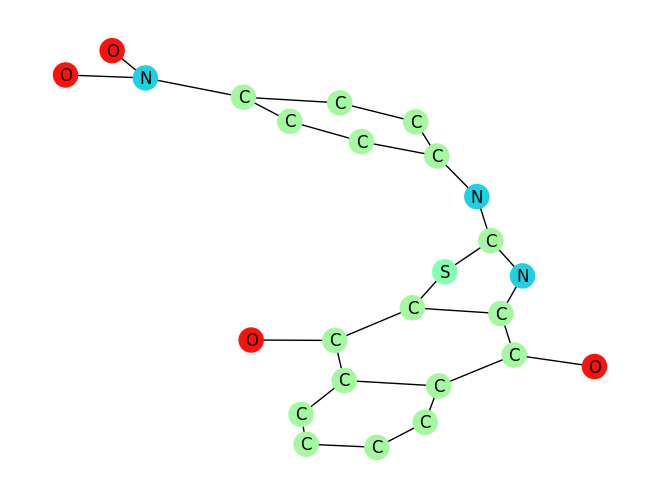

In [ ]:
plt.clf()
visualize(training_set[0])

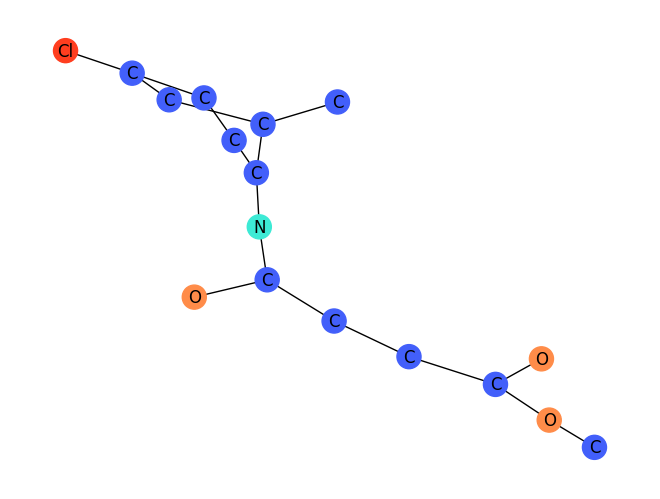

In [ ]:
plt.clf()
visualize(training_set[20])

In [ ]:
# convert data to pandas dataframe
df = pd.DataFrame(training_set, dtype=object)

<Axes: >

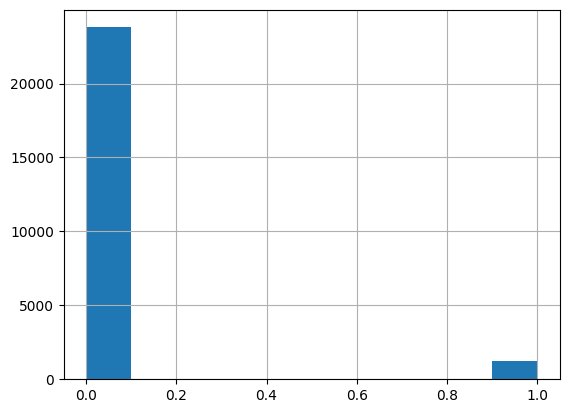

In [ ]:
# plot distribution of labels
df[2].hist()

## Preprocessing

In [ ]:
# split training to training and validation sets
training_set, validation_set = train_test_split(training_set, test_size=0.15,)

In [ ]:
# Define maximum vocabulary size and maximum length of sequences
max_vocab = 500
max_len = 100

# Build vocabulary from the training set
# Extract all nodes from the training set samples
all_nodes = [s[0] for s in training_set]

# Create a Tokenizer object with specified maximum vocabulary size
tokenizer = Tokenizer(num_words=max_vocab)

# Fit the Tokenizer on the list of all nodes to build the vocabulary
tokenizer.fit_on_texts(all_nodes)

In [ ]:
# Set the random seed for reproducibility
random.seed(0)

# Function to prepare a single batch of samples
def prepare_single_batch(samples):
    # Extract nodes from the samples and convert them to sequences using the tokenizer
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)

    # Pad sequences to ensure uniform length
    sample_nodes = pad_sequences(sample_nodes, padding='post')

    # Find the maximum length of nodes in the batch
    max_nodes_len = np.shape(sample_nodes)[1]

    # Extract edges from the samples and adjust indices based on node positions
    edges = [s[1] + i * max_nodes_len for i, s in enumerate(samples)]

    # Remove empty edge lists
    edges = [e for e in edges if len(e) > 0]

    # Create a mapping from nodes to corresponding graphs
    node_to_graph = [[i] * max_nodes_len for i in range(len(samples))]

    # Flatten nodes and edges arrays
    all_nodes = np.reshape(sample_nodes, -1)
    all_edges = np.concatenate(edges)
    node_to_graph = np.reshape(node_to_graph, -1)

    # Return batch data and labels
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2graph': node_to_graph,
    }, np.array([s[2] for s in samples])

# Generator function to yield batches of data from the dataset
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:
        dataset = list(dataset)
        if shuffle:
            random.shuffle(dataset)  # Shuffle the dataset if required
        l = len(dataset)
        # Iterate over the dataset in batches
        for ndx in range(0, l, batch_size):
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]  # Extract batch samples
            yield prepare_single_batch(batch_samples)  # Yield prepared batch
        if not repeat:
            break  # Break the loop if not repeating the dataset


In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)
        print(v)
        pass
    print('label', train_batch[1])
    break

data
[4 4 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 4 4 6 6 6 6 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 8 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 2 2 2 2 2 2 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
edges
[[  0   1]
 [  0   8]
 [  1   9]
 [  2  10]
 [  3  11]
 [  4  15]
 [  5  16]
 [  6   8]
 [  6  10]
 [  6  12]
 [  7   9]
 [  7  11]
 [  7  18]
 [  8  11]
 [  8  13]
 [  9  10]
 [  9  16]
 [ 12  14]
 [ 12  15]
 [ 13  14]
 [ 14  17]
 [ 15  19]
 [ 17  20]
 [ 19  20]
 [ 44  64]
 [ 44  78]
 [ 45  65]
 [ 45  79]
 [ 46  80]
 [ 47  81]
 [ 48  82]
 [ 49  83]
 [ 50  58]
 [ 50  64]
 [ 50  72]
 [ 51  59]
 [ 51  65]
 [ 51  73]
 [ 52  66]
 [ 52  82]
 [ 53  67]
 [ 53  83]
 [ 54  66]
 [ 54  80]
 [ 55  67]
 [ 55  81]
 [ 56  80]
 [ 56  82]
 [ 57  81]
 [ 57  83]
 [ 58  60]
 [ 58  66]
 [ 59  61]
 [ 59  67]
 [ 60  62]
 [ 60  68]
 [ 61  63]
 [ 6

# Training

In [ ]:
from tf2_gnn.layers.gnn import GNN, GNNInput
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


## Relational Graph Convolutional Network (RGCN)

Relational Graph Convolutional Network (RGCN) is an extension of the Graph Convolutional Network (GCN) framework, designed specifically for modeling relational data.

The key idea behind RGCN is to handle different types of relations or edges in the graph. In many real-world graphs, such as knowledge graphs, there are multiple types of relations between nodes. RGCN is designed to handle this multi-relational data.

In an RGCN, different relation types are modeled by different weight matrices. This allows the model to learn different transformation functions for different types of relations.

RGCNs are primarily used for tasks like link prediction and entity classification in knowledge graphs. They have been shown to be effective in dealing with the highly multi-relational data characteristic of realistic knowledge bases.

Trial 1: use the RGCN (default) message_passing mechanism

In [ ]:
def construct_GNN_model(message_calculation_class='rgcn'):

  # Define input layers for data, edges, and node to graph mapping
  data = keras.Input(batch_shape=(None,))

  # the first dim is different to the previous one. it is the total number of edges in this batch
  edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
  node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
  # Embed data using Embedding layer
  embeded = Embedding(tokenizer.num_words, 20)(data)

  # number of graphs (number of samples)
  num_graph = tf.reduce_max(node2graph)+1


  gnn_input = GNNInput(
      node_features=embeded,
      adjacency_lists=(edge,),
      node_to_graph_map=node2graph,
      num_graphs=num_graph,
  )

  # https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
  # Define GNN layer with hyperparameters
  params = GNN.get_default_hyperparameters()
  params["hidden_dim"] = 32
  params["message_calculation_class"] = message_calculation_class
  params["num_heads"] = 3
  print("####params####",params)
  gnn_layer = GNN(params)
  gnn_out = gnn_layer(gnn_input)

  print('gnn_out', gnn_out)

  # Calculate mean using segment_mean
  # https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
  avg = segment_mean(
      data=gnn_out,
      segment_ids=node2graph
  )
  print('mean:', avg)
  # Define output layer with Dense layer
  pred = Dense(1, activation='sigmoid')(avg) # Dense layer with sigmoid activation
  print('pred:', pred)

  # Define the model with input and output layers
  model = Model(
      inputs={
          'data': data,
          'edges': edge,
          'node2grah': node2graph,
      },
      outputs=pred
  )
  model.summary()

  model.compile(
      loss='BinaryCrossentropy',
      metrics=['AUC']
  )

  return model

In [ ]:
model = construct_GNN_model()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None,)]                    0         []                   

In [ ]:
# Set the batch size for training
batch_size = 16

# Calculate the number of batches for training set and validation set
num_batches = math.ceil(len(training_set) / batch_size)  # Calculate number of batches for training set
num_batches_validation = math.ceil(len(validation_set) / batch_size)  # Calculate number of batches for validation set


In [ ]:
# fit the modlel
history = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5
1330/1330 [==============================] - 27s 15ms/step - loss: 0.2339 - auc: 0.5026 - val_loss: 0.1921 - val_auc: 0.6635
Epoch 2/5
1330/1330 [==============================] - 19s 14ms/step - loss: 0.1968 - auc: 0.6122 - val_loss: 0.1795 - val_auc: 0.6357
Epoch 3/5
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1903 - auc: 0.6548 - val_loss: 0.1748 - val_auc: 0.6589
Epoch 4/5
1330/1330 [==============================] - 18s 14ms/step - loss: 0.1889 - auc: 0.6650 - val_loss: 0.1847 - val_auc: 0.7004
Epoch 5/5
1330/1330 [==============================] - 17s 13ms/step - loss: 0.1863 - auc: 0.6880 - val_loss: 0.1766 - val_auc: 0.6969


In [ ]:
def plot_learning_results(history):

  # Plot the loss and val_loss over epochs.
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Plot the AUC and val_AUC over epochs.
  plt.plot(history.history['auc'], label='AUC')
  plt.plot(history.history['val_auc'], label='val_AUC')
  plt.xlabel('Epoch')
  plt.ylabel('AUC')
  plt.legend()
  plt.show()


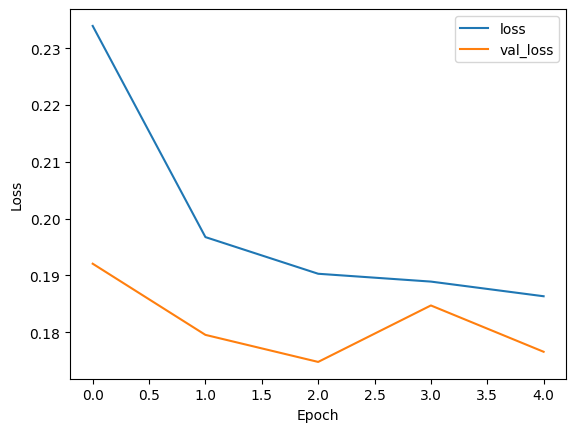

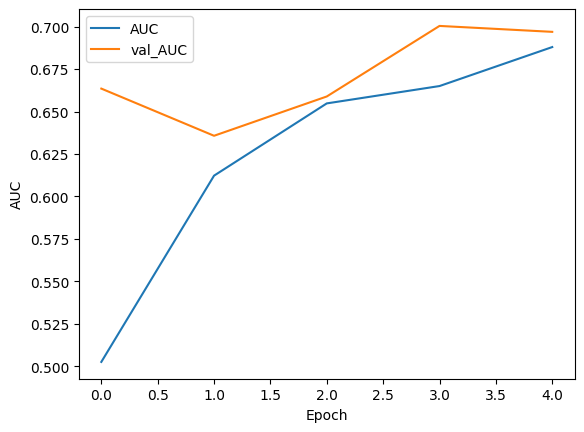

In [ ]:
plot_learning_results(history)

Loss is increasing, no big generalization error..

In [ ]:
def generate_submission_file(model, testing_set):
  y_pred = model.predict(
      gen_batch(testing_set, batch_size=16, shuffle=False)
  )
  y_pred = np.reshape(y_pred, -1)

  submission = pd.DataFrame({'label':y_pred})
  submission.index.name = 'id'
  submission.reset_index(inplace=True)
  submission.to_csv('sample_submission.csv', index=False)

In [ ]:
generate_submission_file(model, testing_set)

771/771 [==============================] - 3s 4ms/step


trial 2: I will try to increase number of epohcs

In [ ]:
history_2 = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1815 - auc: 0.7077 - val_loss: 0.1687 - val_auc: 0.7712
Epoch 2/20
1330/1330 [==============================] - 20s 15ms/step - loss: 0.1787 - auc: 0.7242 - val_loss: 0.2122 - val_auc: 0.7266
Epoch 3/20
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1811 - auc: 0.7043 - val_loss: 0.1701 - val_auc: 0.7633
Epoch 4/20
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1802 - auc: 0.7140 - val_loss: 0.1783 - val_auc: 0.7479
Epoch 5/20
1330/1330 [==============================] - 27s 20ms/step - loss: 0.1807 - auc: 0.7165 - val_loss: 0.1779 - val_auc: 0.7382
Epoch 6/20
1330/1330 [==============================] - 19s 14ms/step - loss: 0.1812 - auc: 0.7145 - val_loss: 0.1724 - val_auc: 0.7403
Epoch 7/20
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1808 - auc: 0.7079 - val_loss: 0.1789 - val_auc: 0.7421
Epoch 8/20
1330/1330 [==========================

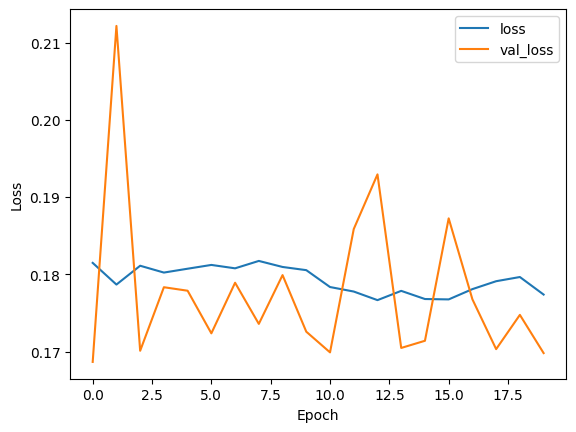

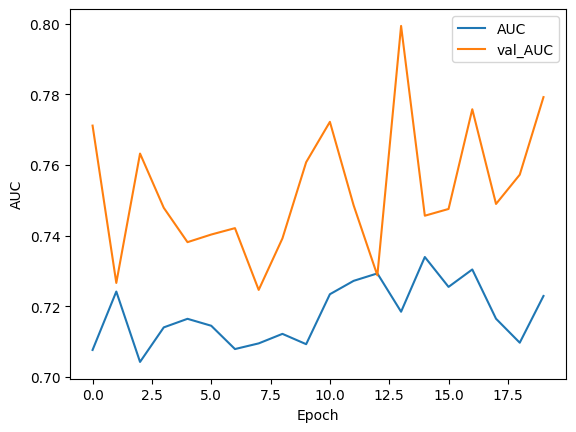

In [ ]:
plot_learning_results(history_2)

It is better on the leaderboard.. but bigger generalization gap

## Gated Graph Neural Networks (GGNN)

Gated Graph Sequence Neural Networks (GGNNs) are a type of Graph Neural Network (GNN) that incorporate gating mechanisms, similar to those in Gated Recurrent Units (GRUs), to control the flow of information through the network.

Key features of GGNNs:

- **Gating Mechanisms**: GGNNs use gating mechanisms to regulate the information that passes through the network. This allows the network to learn complex patterns and dependencies in the data.

- **Sequence Outputs**: Unlike standard GNNs, GGNNs can output sequences, making them suitable for tasks that require sequence predictions.

- **Handling Graph Structured Data**: Like other GNNs, GGNNs are capable of working with graph-structured data. They can handle complex relationships between data points represented as nodes and edges in a graph.

- **Incremental Learning**: GGNNs allow for the layers of the network to learn in increments, rather than creating transformations from scratch.





trial 3: try GGNN message_passing mechanism

In [ ]:
model_ggnn = construct_GNN_model('GGNN')

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None,)]                    0         []     

In [ ]:
history_ggnn = model_ggnn.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5
1330/1330 [==============================] - 26s 16ms/step - loss: 0.1991 - auc: 0.6031 - val_loss: 0.1719 - val_auc: 0.6514
Epoch 2/5
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1900 - auc: 0.6323 - val_loss: 0.1768 - val_auc: 0.6553
Epoch 3/5
1330/1330 [==============================] - 20s 15ms/step - loss: 0.1873 - auc: 0.6587 - val_loss: 0.1724 - val_auc: 0.6887
Epoch 4/5
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1849 - auc: 0.6755 - val_loss: 0.1708 - val_auc: 0.6703
Epoch 5/5
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1838 - auc: 0.6834 - val_loss: 0.1705 - val_auc: 0.6652


In [ ]:
generate_submission_file(model_ggnn, testing_set)

771/771 [==============================] - 4s 5ms/step


RGCN is better than GGNN on the leaderboard

##  Relational Graph Attention Networks (RGAT)

Relational Graph Attention Networks (RGAT) are a class of models that extend non-relational graph attention mechanisms to incorporate relational information. This opens up these methods to a wider variety of problems.

Key features of RGATs include:

- **Handling Multiple Relations**: Unlike standard Graph Attention Networks (GATs) that model simple, single-relational graph data, RGATs are designed to handle multi-relational graphs. This makes them suitable for complex structures like knowledge graphs.

- **Different Weights for Different Relations**: RGATs use different weight matrices for different types of relations, allowing the model to learn different transformation functions for different types of relations.

- **Performance**: Some evaluations have found that RGATs perform worse than anticipated, although some configurations are marginally beneficial for modelling molecular properties.




trial 4: use RGAT mechanism

In [ ]:
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1


gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph,
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'RGAT'
params["num_heads"] = 2
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)


gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_14/StatefulPartitionedCall:0', description="created by layer 'gnn_14'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_45 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_43 (InputLayer)       [(None,)]                    0         []   

In [ ]:
history_rgat = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1330/1330 [==============================] - 34s 20ms/step - loss: 0.2370 - auc: 0.5153 - val_loss: 0.1800 - val_auc: 0.6274
Epoch 2/10
1330/1330 [==============================] - 32s 24ms/step - loss: 0.1958 - auc: 0.6188 - val_loss: 0.1946 - val_auc: 0.6415
Epoch 3/10
1330/1330 [==============================] - 27s 20ms/step - loss: 0.1926 - auc: 0.6340 - val_loss: 0.1870 - val_auc: 0.6515
Epoch 4/10
1330/1330 [==============================] - 29s 22ms/step - loss: 0.1874 - auc: 0.6728 - val_loss: 0.1686 - val_auc: 0.6815
Epoch 5/10
1330/1330 [==============================] - 29s 22ms/step - loss: 0.1844 - auc: 0.6885 - val_loss: 0.1666 - val_auc: 0.7178
Epoch 6/10
1330/1330 [==============================] - 25s 19ms/step - loss: 0.1847 - auc: 0.6925 - val_loss: 0.1668 - val_auc: 0.7153
Epoch 7/10
1330/1330 [==============================] - 26s 19ms/step - loss: 0.1816 - auc: 0.7026 - val_loss: 0.1716 - val_auc: 0.7259
Epoch 8/10
1330/1330 [==========================

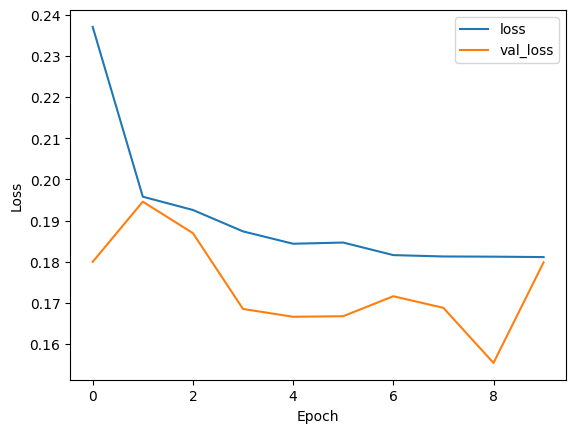

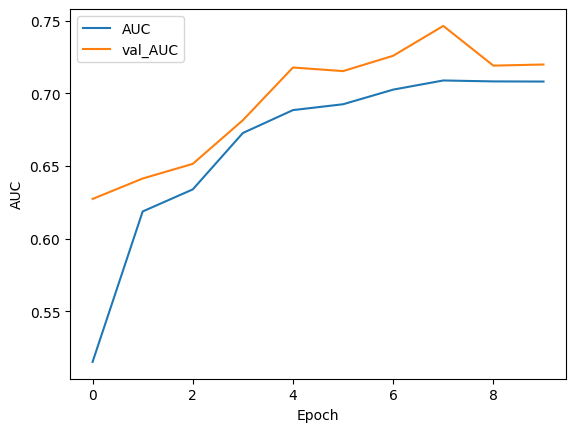

In [ ]:
plot_learning_results(history_rgat)

In [ ]:
generate_submission_file(model, testing_set)

771/771 [==============================] - 4s 5ms/step


trial 5: increase number of epochs

In [ ]:
history_rgat_2 = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/50
1330/1330 [==============================] - 34s 25ms/step - loss: 0.1794 - auc: 0.7158 - val_loss: 0.1641 - val_auc: 0.7314
Epoch 2/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.1797 - auc: 0.7141 - val_loss: 0.1646 - val_auc: 0.7143
Epoch 3/50
1330/1330 [==============================] - 31s 23ms/step - loss: 0.1792 - auc: 0.7145 - val_loss: 0.1660 - val_auc: 0.7025
Epoch 4/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.1810 - auc: 0.7137 - val_loss: 0.1625 - val_auc: 0.7304
Epoch 5/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.1796 - auc: 0.7190 - val_loss: 0.1802 - val_auc: 0.7096
Epoch 6/50
1330/1330 [==============================] - 26s 20ms/step - loss: 0.1782 - auc: 0.7197 - val_loss: 0.1647 - val_auc: 0.7173
Epoch 7/50
1330/1330 [==============================] - 30s 23ms/step - loss: 0.1789 - auc: 0.7211 - val_loss: 0.1924 - val_auc: 0.6929
Epoch 8/50
1330/1330 [==========================

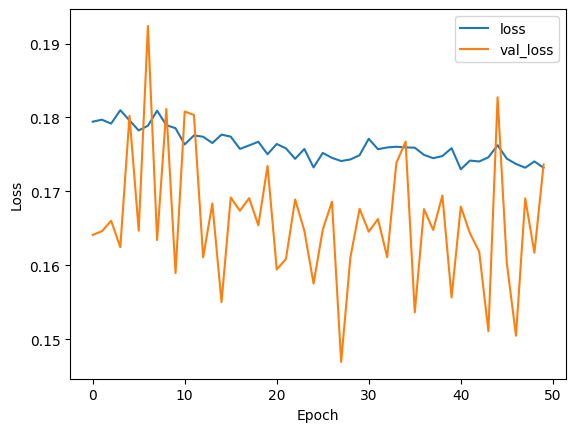

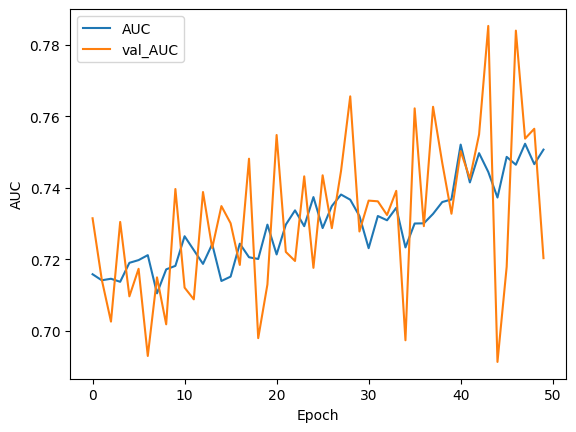

In [ ]:
plot_learning_results(history_rgat_2)

It doesn't seem stable but.. it is the best on the leaderboard now


In [ ]:
generate_submission_file(model, testing_set)

771/771 [==============================] - 4s 5ms/step


## Upsampling
I will try to upsample first, then re-train with different message_passing mechanisms

In [ ]:
type(training_set)

list

In [ ]:
# converts data to pandas df
df_train = pd.DataFrame(training_set, dtype=object)
df_train.head()

,0,1,2
0,"[O, O, N, C, C, C, C, C, C, C, C, C, C, C, C, ...","[[0, 4], [0, 6], [1, 7], [2, 7], [2, 9], [2, 1...",0
1,"[O, O, O, N, C, C, C, C, C, C, C, C, C, C, C, ...","[[0, 4], [0, 6], [1, 6], [2, 12], [2, 18], [3,...",0
2,"[O, O, N, N, C, C, C, C, C, C, C, C, C, C, C, ...","[[0, 14], [1, 15], [2, 5], [2, 14], [3, 6], [3...",0
3,"[O, O, N, N, C, C, C, C, C, C, C, C, C, C, C, ...","[[0, 7], [1, 13], [1, 18], [2, 5], [2, 6], [3,...",1
4,"[Cl, Cl, Cl, F, F, F, C, C, C, C, C, C, C, C, ...","[[0, 6], [1, 7], [2, 8], [3, 9], [4, 9], [5, 9...",0


<Axes: >

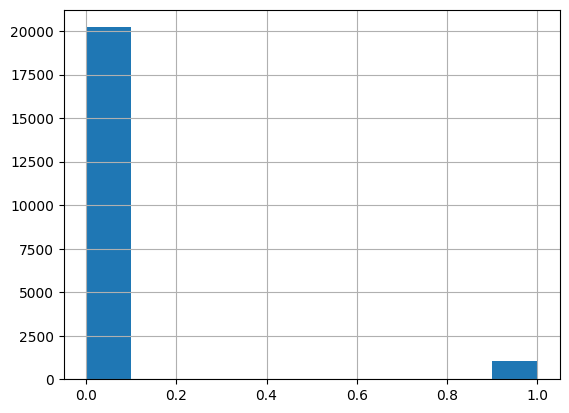

In [ ]:
# plot distribution of classed
df_train[2].hist()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = df_train[df_train[2]==0]
data_minority = df_train[df_train[2]==1]

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])


<Axes: >

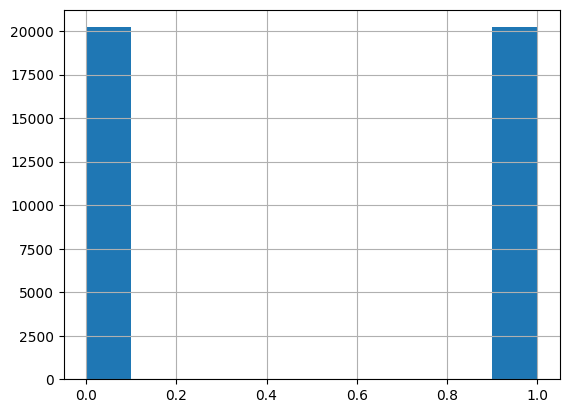

In [ ]:
data_upsampled[2].hist()

In [ ]:
# convert again to list after upsampling
training_set_upsampled = data_upsampled.values.tolist()

trial 6: train with RGAT with the upsampled training set

### RGAT

In [ ]:
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1


gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph,
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["message_calculation_class"] = 'RGAT'
params["num_heads"] = 2
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)


gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_15/StatefulPartitionedCall:0', description="created by layer 'gnn_15'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_48 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 input_46 (InputLayer)       [(None,)]                    0         []   

In [ ]:
history_rgat_3 = model.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/50
1330/1330 [==============================] - 32s 21ms/step - loss: 0.6633 - auc: 0.6366 - val_loss: 0.6850 - val_auc: 0.6853
Epoch 2/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.6182 - auc: 0.7153 - val_loss: 0.6680 - val_auc: 0.7218
Epoch 3/50
1330/1330 [==============================] - 28s 21ms/step - loss: 0.6066 - auc: 0.7330 - val_loss: 0.7087 - val_auc: 0.7412
Epoch 4/50
1330/1330 [==============================] - 30s 22ms/step - loss: 0.5915 - auc: 0.7502 - val_loss: 0.7181 - val_auc: 0.7500
Epoch 5/50
1330/1330 [==============================] - 27s 21ms/step - loss: 0.5818 - auc: 0.7609 - val_loss: 0.6678 - val_auc: 0.7508
Epoch 6/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.5817 - auc: 0.7622 - val_loss: 0.5794 - val_auc: 0.7672
Epoch 7/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.5691 - auc: 0.7748 - val_loss: 0.6872 - val_auc: 0.7600
Epoch 8/50
1330/1330 [==========================

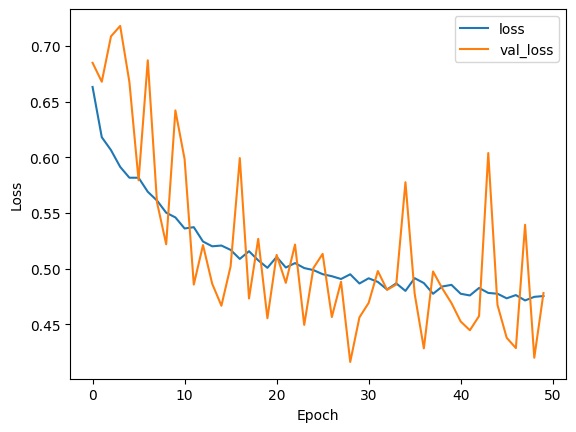

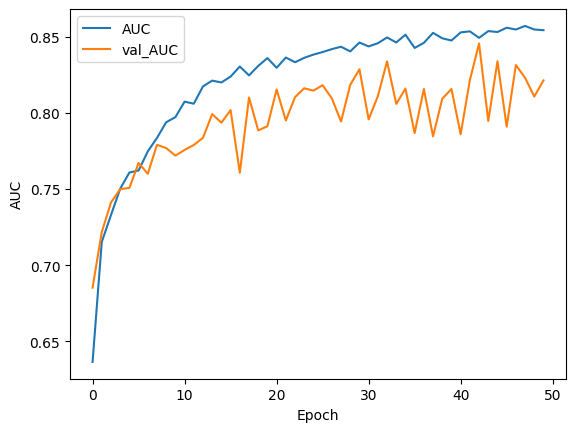

In [ ]:
plot_learning_results(history_rgat_3)

In [ ]:
generate_submission_file(model, testing_set)

771/771 [==============================] - 5s 6ms/step


This is the best result we got so far🎖️🎖️🎖️
Upsampling saved us :D

As increasing number of epochs has proved better performance, I notice that sometime there is not big change so, I want to try early stopping technique.


trial 7: use early stopping

In [ ]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value
)

history_rgat_4 = model.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)


Epoch 1/50
1330/1330 [==============================] - 28s 21ms/step - loss: 0.4739 - auc: 0.8561 - val_loss: 0.4657 - val_auc: 0.8227
Epoch 2/50
1330/1330 [==============================] - 26s 19ms/step - loss: 0.4722 - auc: 0.8567 - val_loss: 0.5789 - val_auc: 0.8277
Epoch 3/50
1330/1330 [==============================] - 30s 22ms/step - loss: 0.4685 - auc: 0.8592 - val_loss: 0.5114 - val_auc: 0.8045
Epoch 4/50
1330/1330 [==============================] - 28s 21ms/step - loss: 0.4719 - auc: 0.8577 - val_loss: 0.5120 - val_auc: 0.8290
Epoch 5/50
1330/1330 [==============================] - 30s 22ms/step - loss: 0.4753 - auc: 0.8546 - val_loss: 0.4767 - val_auc: 0.8197
Epoch 6/50
1330/1330 [==============================] - 32s 24ms/step - loss: 0.4663 - auc: 0.8606 - val_loss: 0.3965 - val_auc: 0.8223
Epoch 7/50
1330/1330 [==============================] - 32s 24ms/step - loss: 0.4671 - auc: 0.8611 - val_loss: 0.5094 - val_auc: 0.8263
Epoch 8/50
1330/1330 [==========================

wow after 11, that will save resources

In [ ]:
generate_submission_file(model, testing_set)

771/771 [==============================] - 4s 5ms/step


get slightly better, still the best 👏🏻

trial 8: change batch size from 16 to 32

In [ ]:
history_rgat_5 = model.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)


Epoch 1/50
1330/1330 [==============================] - 34s 25ms/step - loss: 0.4664 - auc: 0.8610 - val_loss: 0.3722 - val_auc: 0.8152
Epoch 2/50
1330/1330 [==============================] - 27s 20ms/step - loss: 0.4722 - auc: 0.8574 - val_loss: 0.4394 - val_auc: 0.8226
Epoch 3/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.4620 - auc: 0.8639 - val_loss: 0.4182 - val_auc: 0.8094
Epoch 4/50
1330/1330 [==============================] - 25s 19ms/step - loss: 0.4686 - auc: 0.8595 - val_loss: 0.4008 - val_auc: 0.8255
Epoch 5/50
1330/1330 [==============================] - 29s 22ms/step - loss: 0.4667 - auc: 0.8608 - val_loss: 0.3885 - val_auc: 0.8066
Epoch 6/50
1330/1330 [==============================] - 26s 19ms/step - loss: 0.4649 - auc: 0.8611 - val_loss: 0.4480 - val_auc: 0.8044


In [ ]:
generate_submission_file(model, testing_set)

771/771 [==============================] - 4s 5ms/step


it is not better than batch size 16

### GGNN

trial 9: use GGNN message_passing mechanism with the upsampled training data

In [ ]:
model_ggnn = construct_GNN_model('GGNN')

####params#### {'aggregation_function': 'sum', 'message_activation_function': 'relu', 'message_activation_before_aggregation': False, 'hidden_dim': 32, 'use_target_state_as_input': False, 'normalize_by_num_incoming': True, 'num_edge_MLP_hidden_layers': 0, 'message_calculation_class': 'GGNN', 'initial_node_representation_activation': 'tanh', 'dense_intermediate_layer_activation': 'tanh', 'num_layers': 4, 'dense_every_num_layers': 2, 'residual_every_num_layers': 2, 'use_inter_layer_layernorm': False, 'layer_input_dropout_rate': 0.0, 'global_exchange_mode': 'gru', 'global_exchange_every_num_layers': 2, 'global_exchange_weighting_fun': 'softmax', 'global_exchange_num_heads': 4, 'global_exchange_dropout_rate': 0.2, 'num_heads': 3}
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_16/StatefulPartitionedCall:0', description="created by layer 'gnn_16'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='

In [ ]:
history_ggnn = model_ggnn.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/50
1330/1330 [==============================] - 28s 18ms/step - loss: 0.6437 - auc: 0.6678 - val_loss: 0.5996 - val_auc: 0.7023
Epoch 2/50
1330/1330 [==============================] - 21s 16ms/step - loss: 0.6125 - auc: 0.7197 - val_loss: 0.6079 - val_auc: 0.7279
Epoch 3/50
1330/1330 [==============================] - 20s 15ms/step - loss: 0.5813 - auc: 0.7594 - val_loss: 0.6172 - val_auc: 0.7489
Epoch 4/50
1330/1330 [==============================] - 21s 16ms/step - loss: 0.5650 - auc: 0.7778 - val_loss: 0.6314 - val_auc: 0.7748
Epoch 5/50
1330/1330 [==============================] - 20s 15ms/step - loss: 0.5448 - auc: 0.7986 - val_loss: 0.6058 - val_auc: 0.7787
Epoch 6/50
1330/1330 [==============================] - 21s 16ms/step - loss: 0.5411 - auc: 0.8044 - val_loss: 0.4474 - val_auc: 0.8010
Epoch 7/50
1330/1330 [==============================] - 21s 15ms/step - loss: 0.5181 - auc: 0.8231 - val_loss: 0.5039 - val_auc: 0.8224
Epoch 8/50
1330/1330 [==========================

it is actually better than the initial GGNN we trained before



In [ ]:
generate_submission_file(model_ggnn, testing_set)

771/771 [==============================] - 5s 6ms/step


trial 10: change batch size to 32

In [ ]:
history_ggnn_2 = model_ggnn.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/50
1330/1330 [==============================] - 23s 17ms/step - loss: 0.4531 - auc: 0.8700 - val_loss: 0.4609 - val_auc: 0.8266
Epoch 2/50
1330/1330 [==============================] - 20s 15ms/step - loss: 0.4410 - auc: 0.8774 - val_loss: 0.4875 - val_auc: 0.8247
Epoch 3/50
1330/1330 [==============================] - 21s 16ms/step - loss: 0.4226 - auc: 0.8881 - val_loss: 0.5340 - val_auc: 0.8314
Epoch 4/50
1330/1330 [==============================] - 22s 16ms/step - loss: 0.4163 - auc: 0.8914 - val_loss: 0.4855 - val_auc: 0.8383
Epoch 5/50
1330/1330 [==============================] - 21s 16ms/step - loss: 0.4023 - auc: 0.8990 - val_loss: 0.5540 - val_auc: 0.8547
Epoch 6/50
1330/1330 [==============================] - 21s 16ms/step - loss: 0.3941 - auc: 0.9033 - val_loss: 0.3959 - val_auc: 0.8450
Epoch 7/50
1330/1330 [==============================] - 22s 16ms/step - loss: 0.3823 - auc: 0.9089 - val_loss: 0.3876 - val_auc: 0.8402
Epoch 8/50
1330/1330 [==========================

In [ ]:
generate_submission_file(model_ggnn, testing_set)

771/771 [==============================] - 4s 5ms/step


changing batch size didn't change a lot

### RGCN

trial 11: use RGCN with the upsampled training data

In [ ]:
model_rgcn = construct_GNN_model()

####params#### {'aggregation_function': 'sum', 'message_activation_function': 'relu', 'message_activation_before_aggregation': False, 'hidden_dim': 32, 'use_target_state_as_input': False, 'normalize_by_num_incoming': True, 'num_edge_MLP_hidden_layers': 0, 'message_calculation_class': 'rgcn', 'initial_node_representation_activation': 'tanh', 'dense_intermediate_layer_activation': 'tanh', 'num_layers': 4, 'dense_every_num_layers': 2, 'residual_every_num_layers': 2, 'use_inter_layer_layernorm': False, 'layer_input_dropout_rate': 0.0, 'global_exchange_mode': 'gru', 'global_exchange_every_num_layers': 2, 'global_exchange_weighting_fun': 'softmax', 'global_exchange_num_heads': 4, 'global_exchange_dropout_rate': 0.2, 'num_heads': 3}
gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_17/StatefulPartitionedCall:0', description="created by layer 'gnn_17'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='

In [ ]:
history_rgcn = model_rgcn.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/50
1330/1330 [==============================] - 21s 14ms/step - loss: 0.6581 - auc: 0.6519 - val_loss: 0.7896 - val_auc: 0.7041
Epoch 2/50
1330/1330 [==============================] - 18s 13ms/step - loss: 0.6108 - auc: 0.7267 - val_loss: 0.7056 - val_auc: 0.7326
Epoch 3/50
1330/1330 [==============================] - 16s 12ms/step - loss: 0.5963 - auc: 0.7476 - val_loss: 0.6594 - val_auc: 0.7302
Epoch 4/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5853 - auc: 0.7588 - val_loss: 0.6483 - val_auc: 0.7463
Epoch 5/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5780 - auc: 0.7700 - val_loss: 0.5981 - val_auc: 0.7498
Epoch 6/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5721 - auc: 0.7723 - val_loss: 0.7286 - val_auc: 0.7470
Epoch 7/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5562 - auc: 0.7892 - val_loss: 0.5978 - val_auc: 0.7385
Epoch 8/50
1330/1330 [==========================

trial 12: RGCN, upsampled data and batch size 32

In [ ]:
history_rgcn_2 = model_rgcn.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5499 - auc: 0.7944 - val_loss: 0.5695 - val_auc: 0.7813
Epoch 2/50
1330/1330 [==============================] - 19s 14ms/step - loss: 0.5389 - auc: 0.8071 - val_loss: 0.4537 - val_auc: 0.7788
Epoch 3/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5333 - auc: 0.8111 - val_loss: 0.5471 - val_auc: 0.7730
Epoch 4/50
1330/1330 [==============================] - 19s 14ms/step - loss: 0.5296 - auc: 0.8143 - val_loss: 0.4146 - val_auc: 0.7835
Epoch 5/50
1330/1330 [==============================] - 17s 12ms/step - loss: 0.5251 - auc: 0.8181 - val_loss: 0.4352 - val_auc: 0.7875
Epoch 6/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5163 - auc: 0.8256 - val_loss: 0.5864 - val_auc: 0.8019
Epoch 7/50
1330/1330 [==============================] - 17s 13ms/step - loss: 0.5092 - auc: 0.8311 - val_loss: 0.4652 - val_auc: 0.7960
Epoch 8/50
1330/1330 [==========================

trial 13: RGCN, upsampled data and batch size 64

In [ ]:
history_rgcn_3 = model_rgcn.fit(
    gen_batch(
        training_set_upsampled, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=50,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/50
1330/1330 [==============================] - 19s 14ms/step - loss: 0.5220 - auc: 0.8196 - val_loss: 0.5130 - val_auc: 0.8000
Epoch 2/50
1330/1330 [==============================] - 18s 14ms/step - loss: 0.5154 - auc: 0.8264 - val_loss: 0.4575 - val_auc: 0.7850
Epoch 3/50
1330/1330 [==============================] - 18s 14ms/step - loss: 0.5119 - auc: 0.8291 - val_loss: 0.4711 - val_auc: 0.8088
Epoch 4/50
1330/1330 [==============================] - 17s 12ms/step - loss: 0.5064 - auc: 0.8341 - val_loss: 0.4624 - val_auc: 0.8013
Epoch 5/50
1330/1330 [==============================] - 17s 12ms/step - loss: 0.4928 - auc: 0.8430 - val_loss: 0.4601 - val_auc: 0.8128
Epoch 6/50
1330/1330 [==============================] - 18s 13ms/step - loss: 0.4957 - auc: 0.8420 - val_loss: 0.4293 - val_auc: 0.7992
Epoch 7/50
1330/1330 [==============================] - 18s 13ms/step - loss: 0.4855 - auc: 0.8490 - val_loss: 0.5064 - val_auc: 0.8076
Epoch 8/50
1330/1330 [==========================

Different batch sizes doesn't have significant change to the perfomance.

**In conclusion**, my results have proven that GGNN with upsampled training data gets the best performance.